# EDA is performed on Travel database. Very limited description is available and efforts are made to draw useful insights from the data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statistics

Importing dataset 

In [3]:
data= df=pd.read_csv('travel.csv')

In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


Let's understand the database first

CustomerID                    - Customer ID
ProdTaken                     - Product taken or not
Age                           - Age of customer
TypeofContact                 - The type of source
CityTier                      - City tier of customer 
DurationOfPitch               - Time of pitch given to customer
Occupation                    - Occupation of customer
Gender                        - Gender of customer
NumberOfPersonVisiting        - Total number of person visiting
NumberOfFollowups             - Number of follw-ups done(More clairity required)
ProductPitched                - Type of product pitched
PreferredPropertyStar         - Property opted
MaritalStatus                 - Marital status of customer
NumberOfTrips                 - Number of times travelled
Passport                      - If possess a passport
PitchSatisfactionScore        - Pitch satisfaction score
OwnCar                        - Does own a car or not
NumberOfChildrenVisiting      - Number of childerns visiting
Designation                   - Designation of customer
MonthlyIncome                 - Total Monthly income

In [6]:
data.shape ##to find the shape of the data  -4888 rows & 20 columns

(4888, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [8]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [14]:
data['CustomerID'].nunique()

4888

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

# It is observed that few of the columns have null values and that need to be treated

Here age column is been treated for null values

In [19]:
data['Age'].min()

18.0

In [20]:
data['Age'].max()

61.0

In [21]:
data['Age'].mean()

37.62226512226512

In [22]:
data['Age'].median()

36.0

In [23]:
data['Age'].mode()

0    35.0
dtype: float64

# Conclusion- It is observed that there is no major difference between mean, median and mode so null values can be replaced with median

In [31]:
data['Age'].fillna(data['Age'].median(),inplace=True)


In [33]:
data[data['Age'].isnull()==True]


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


In [37]:
data['Age'].isnull().sum()   # All null values have been replaced with median

0

In [39]:
data.memory_usage()

Index                         128
CustomerID                  39104
ProdTaken                   39104
Age                         39104
TypeofContact               39104
CityTier                    39104
DurationOfPitch             39104
Occupation                  39104
Gender                      39104
NumberOfPersonVisiting      39104
NumberOfFollowups           39104
ProductPitched              39104
PreferredPropertyStar       39104
MaritalStatus               39104
NumberOfTrips               39104
Passport                    39104
PitchSatisfactionScore      39104
OwnCar                      39104
NumberOfChildrenVisiting    39104
Designation                 39104
MonthlyIncome               39104
dtype: int64

# Let's differntiate data based on numerical/categorial columns

In [43]:
cat_col= [fea for fea in data.columns if data[fea].dtypes=='O']

In [44]:
cat_col

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [46]:
num_col= [fea for fea in data.columns if data[fea].dtypes != 'O']

num_col

In [47]:
num_col

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [48]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.547259,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.104795,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.547259,9.104795,18.0,31.00,36.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


# Selecting discrete and continuous data

In [53]:
num_col_discrete = [fea for fea in data.columns if data[fea].dtypes== 'int64'] #selecting data based on type 'int64' as discrete data

In [54]:
num_col_continuous = [fea for fea in data.columns if data[fea].dtypes== 'float64'] #selecting data based on type 'float64' as continuous data

In [56]:
data[num_col_continuous].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4888.0,37.547259,9.104795,18.0,31.0,36.0,43.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


In [57]:
data[num_col_discrete].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0
OwnCar,4888.0,0.620295,0.485363,0.0,0.00,1.0,1.00,1.0


# Plotting continuous features to understand the distribution of continous variables

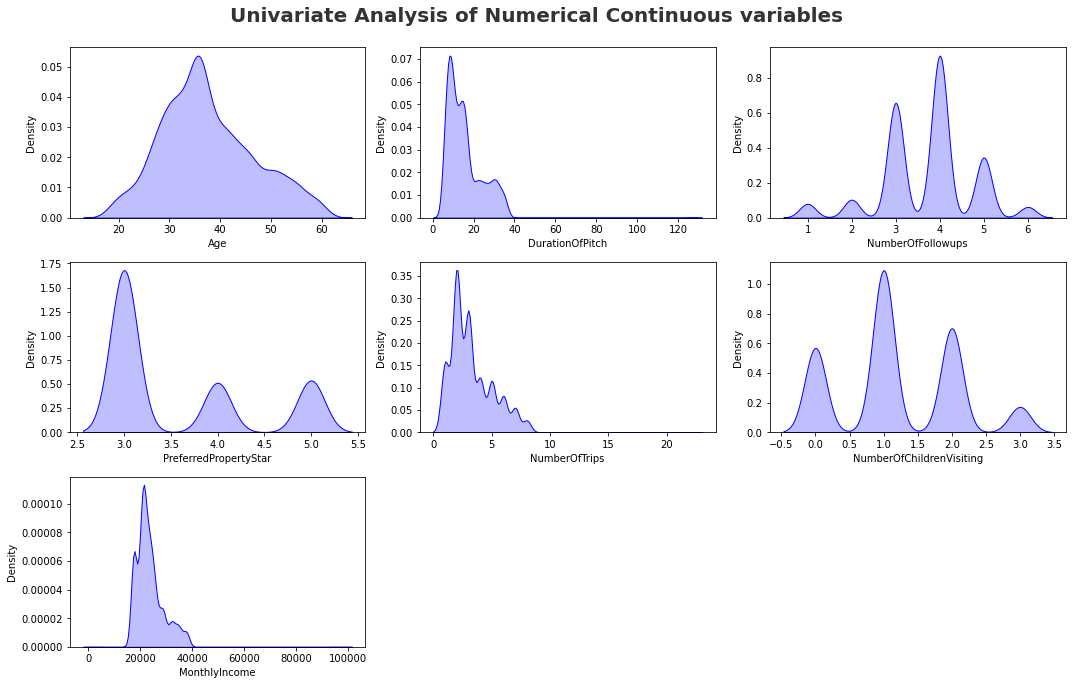

In [63]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Continuous variables', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col_continuous)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[num_col_continuous[i]],shade=True, color='b')
    plt.xlabel(num_col_continuous[i])
    plt.tight_layout()

# from above we can find out that duration of pitch , number of trips and monthly income have outliers and are right-skewed


# Analysis of categorical data

In [64]:
cat_col

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

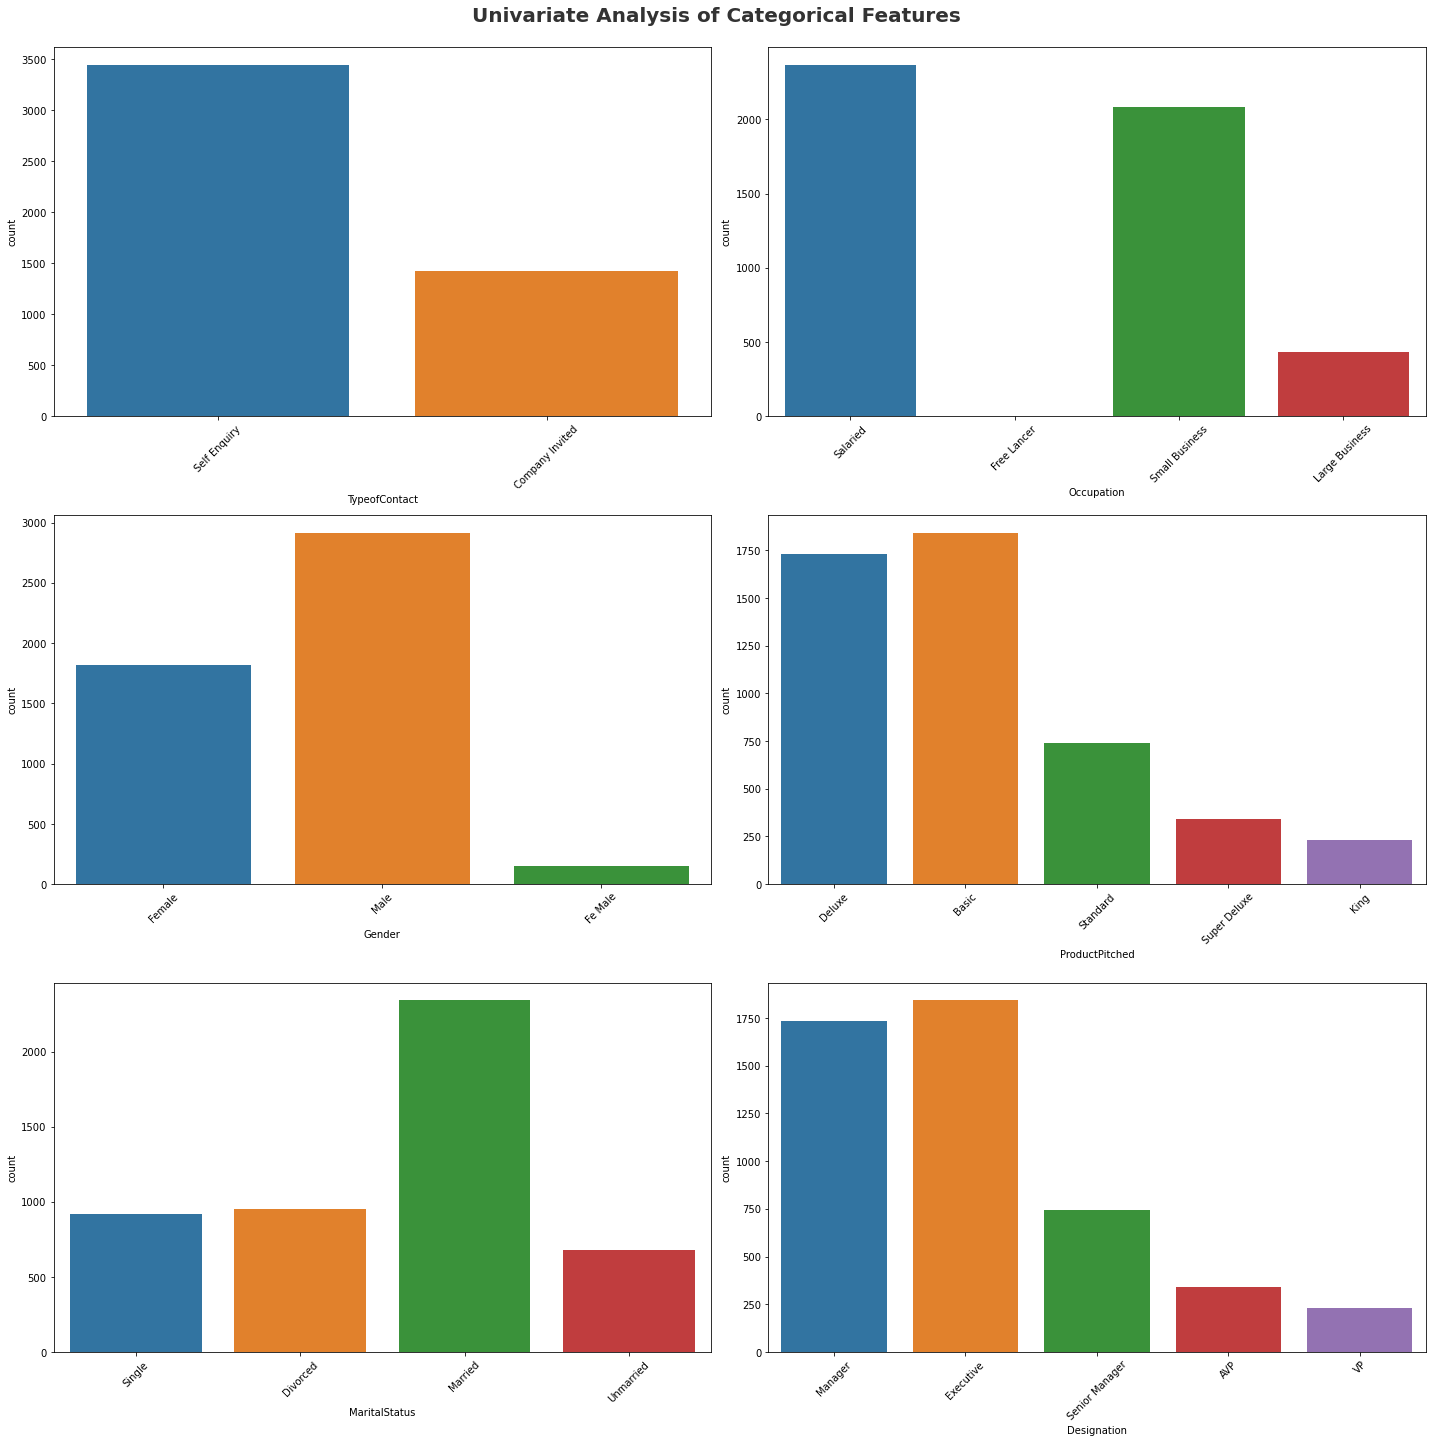

In [65]:
# categorical columns
plt.figure(figsize=(20, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=data[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Observations from the analysis

# Checking the correlations among the continuous features

In [67]:
data.corr()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.038442,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833
ProdTaken,0.056506,1.000000,-0.143753,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,0.038442,-0.143753,1.000000,-0.012754,-0.011443,0.017856,0.001960,-0.010498,0.183457,0.032398,0.017392,0.047356,0.011999,0.463867
CityTier,0.012975,0.086852,-0.012754,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.064298,0.078257,-0.011443,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.604013,0.009627,0.017856,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.427539,0.112171,0.001960,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.010553,0.099577,-0.010498,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.224848,0.018898,0.183457,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.007974,0.260844,0.032398,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545


# Correlations through Heatmaps

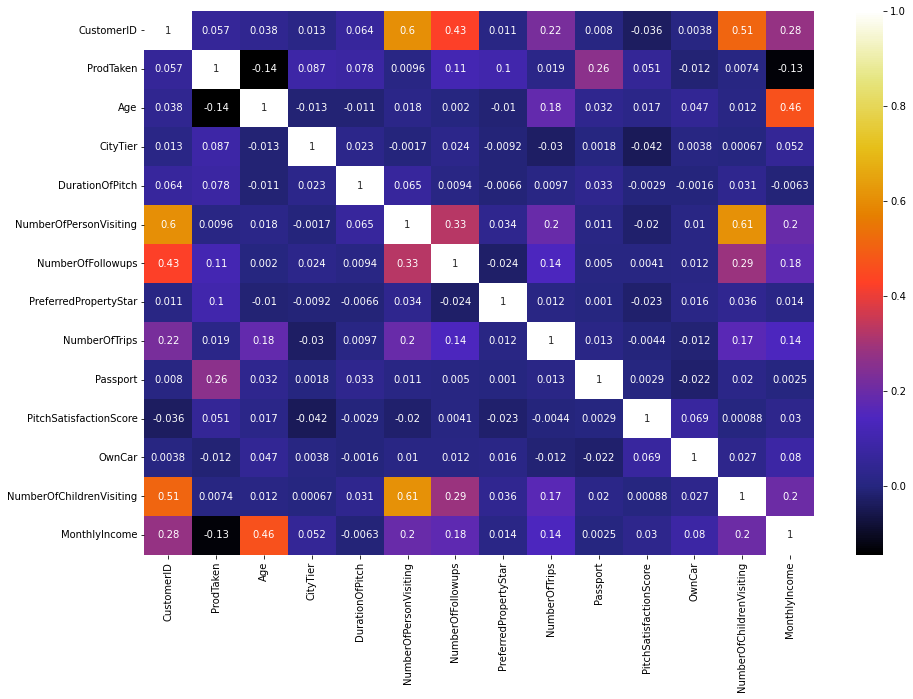

In [68]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)
plt.show()

In [69]:
selected_num_col=['ProdTaken',
 'Age',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'Passport',
 'OwnCar',
 'MonthlyIncome']

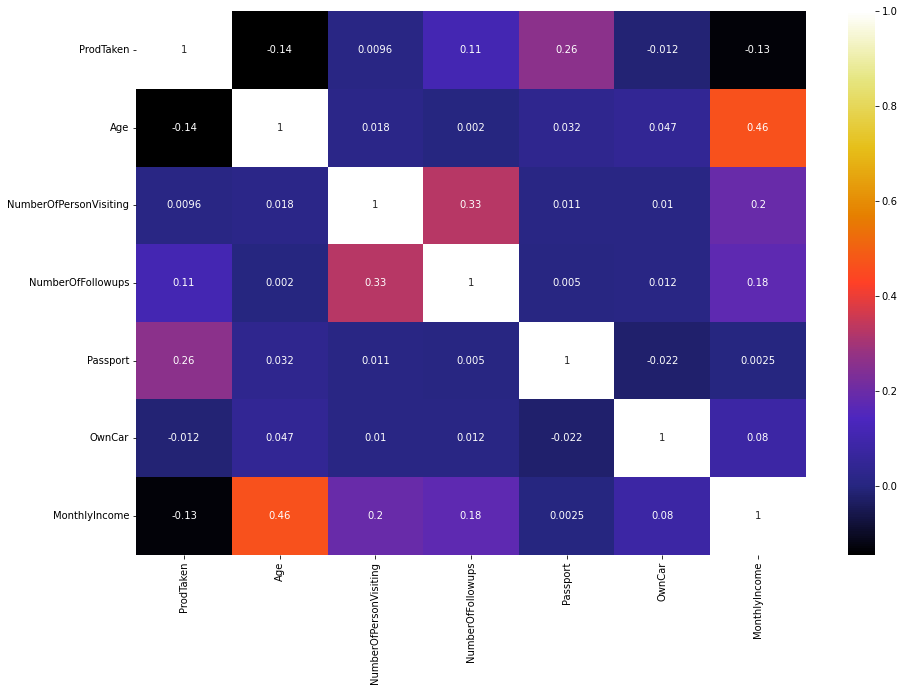

In [70]:
plt.figure(figsize = (15,10))
sns.heatmap(data[selected_num_col].corr(), cmap="CMRmap", annot=True)
plt.show()

# Let's now visualize our data to retrieve some insights


Distribution to show monthly income vs age


<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

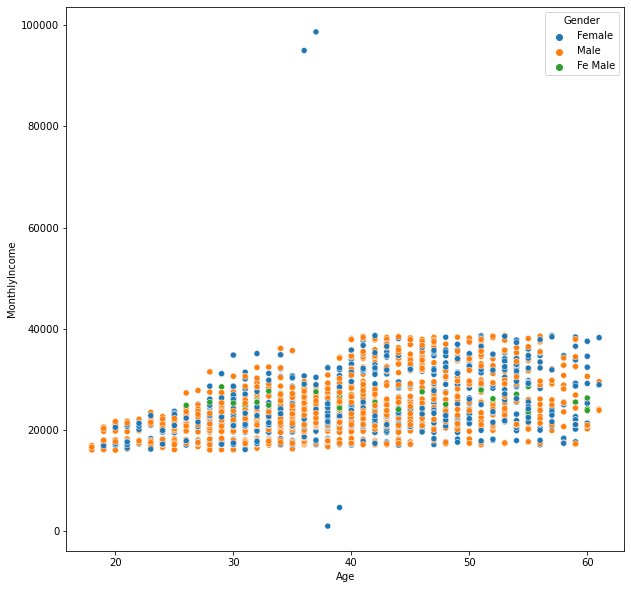

In [72]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Age'],y=data['MonthlyIncome'],hue=data['Gender'])


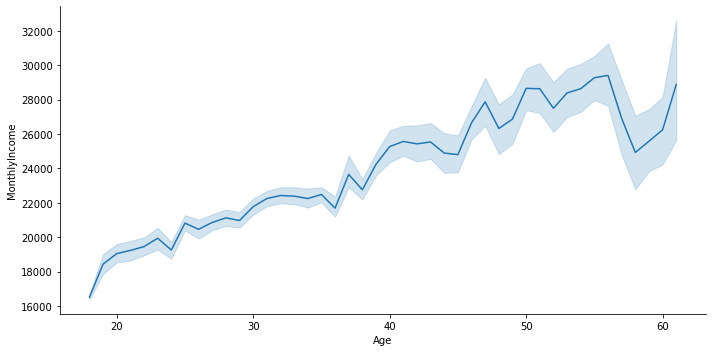

In [73]:
sns.relplot(x=data['Age'],y=data['MonthlyIncome'],kind="line",height=5,aspect=2)


<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

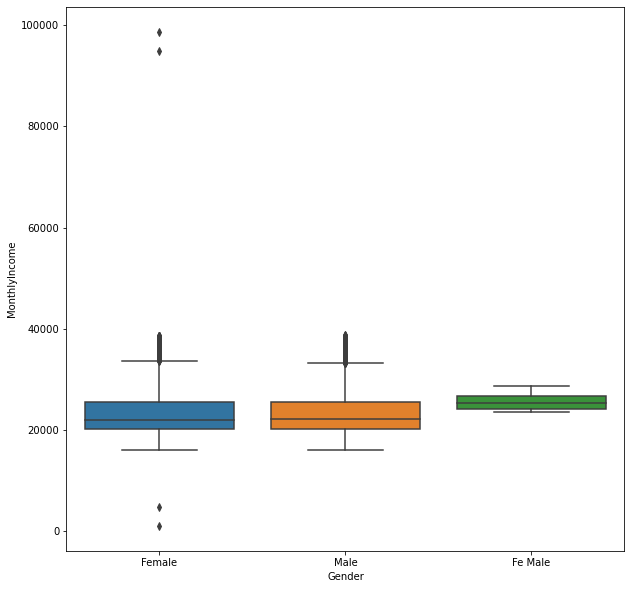

In [74]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x="Gender",y="MonthlyIncome")

Observations - Two outliers can be seen in income and needs some attention
Trend of income increases with age however dips around age 55

Observations - To be specific the outliers are seen in Female gender type
Also no clarity is present on for 3rd Gender type which can be treated later
Income range for both Male/Female is moderately same

In [76]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

# Bar plot to check occupation vs mean monthly Income


<AxesSubplot:xlabel='Occupation', ylabel='MonthlyIncome'>

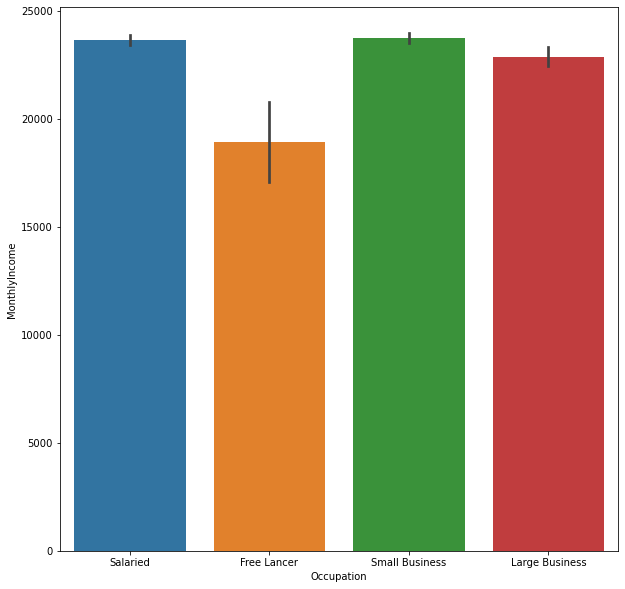

In [77]:
plt.figure(figsize=(10,10))
sns.barplot(data=data,x='Occupation',y='MonthlyIncome')

Observation - Salaried and small business owners have higher mean income

# Bar plot based on Occupation to show monthly income for different designations

<AxesSubplot:xlabel='Designation', ylabel='MonthlyIncome'>

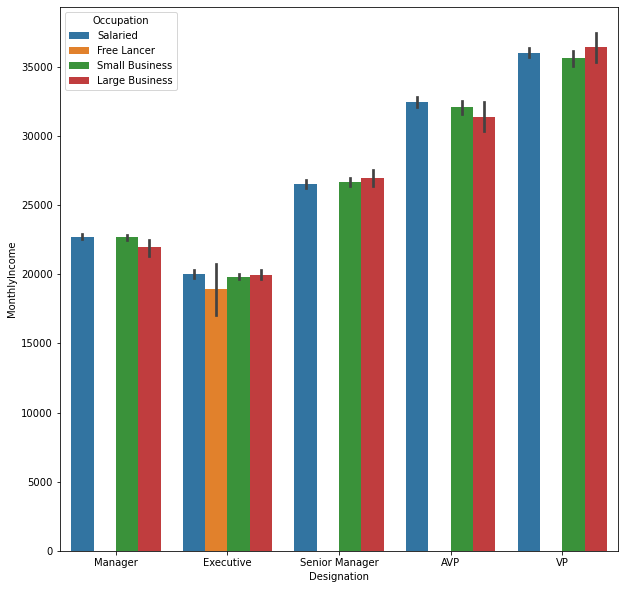

In [78]:
plt.figure(figsize=(10,10))
sns.barplot(data=data,x='Designation',y='MonthlyIncome',hue='Occupation')

# Lets find out which age has maximum number of trips

In [96]:
df_age_trips = data.groupby(['Age'])['NumberOfTrips'].count().sort_values(ascending =False).reset_index()


In [97]:
df_age_trips.head()

,Age,NumberOfTrips
0,36.0,457
1,35.0,236
2,34.0,209
3,31.0,203
4,30.0,199


In [98]:
top_10_age=df_age_trips.Age.values[:10] #slicing operation for top 10 age from a sorted dataframe


In [99]:
top_10_age

array([36., 35., 34., 31., 30., 32., 33., 37., 29., 38.])

In [100]:
top_10_trips = df_age_trips.NumberOfTrips.values[:10] #slicing operation for top 10 trips from a sorted dataframe


In [101]:
top_10_trips

array([457, 236, 209, 203, 199, 197, 189, 185, 178, 176], dtype=int64)

In [103]:
#slicing operation for bottome 10 age and trips from a sorted dataframe
bottom_10_age,bottom_10_trips = df_age_trips.Age.values[(len(df_age_trips)-10):],df_age_trips.NumberOfTrips.values[(len(df_age_trips)-10):]

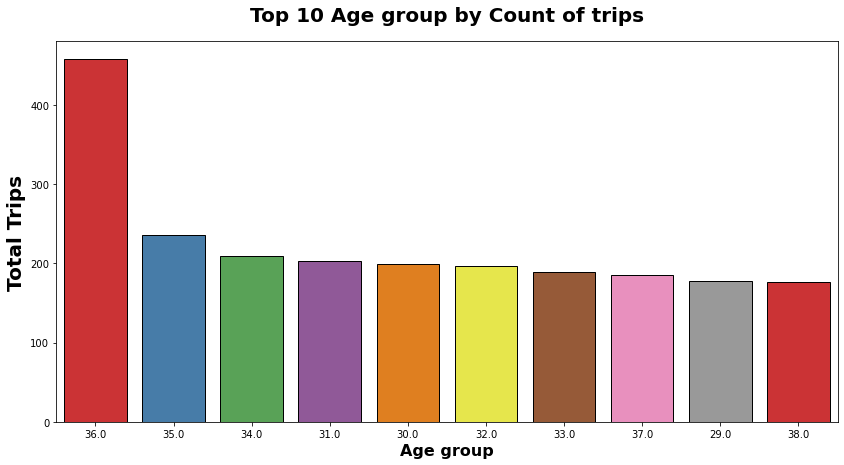

In [104]:
# Plotting top 10 age group by total trips
plt.subplots(figsize=(14,7))
sns.barplot(data=df_age_trips,x=top_10_age,y=top_10_trips,order=top_10_age,palette="Set1",ec='black',capsize=0)
plt.title("Top 10 Age group by Count of trips", weight="bold",fontsize=20, pad=20)
plt.ylabel("Total Trips", weight="bold", fontsize=20)
plt.xlabel("Age group", weight="bold", fontsize=16)
plt.show()

# Obseravation - At the age of 36, people travelled most
Let's see if income effects the spirit to travel anyhow or not below
Age 29-38 forms the top 10 age to make trips

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

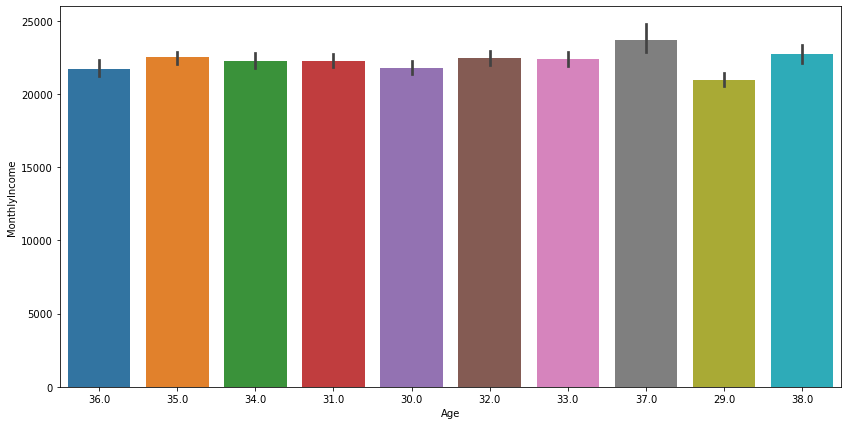

In [105]:
plt.figure(figsize=(14,7))
sns.barplot(data=data,x=data['Age'],y='MonthlyIncome',order=top_10_age)

# Observations - The income level is not highest at age 36, but travelling is most
Let's check for bottom 10 age group by trips next

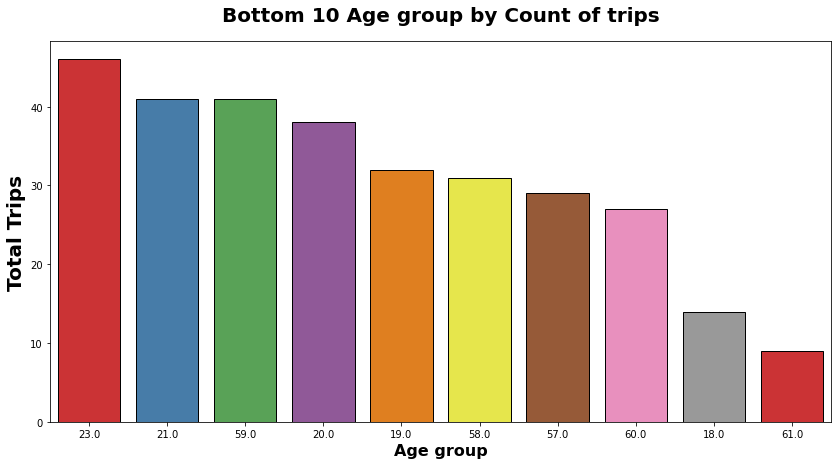

In [106]:
plt.subplots(figsize=(14,7))
sns.barplot(data=df_age_trips,x=bottom_10_age,y=bottom_10_trips,order=bottom_10_age,palette="Set1",ec='black')
plt.title("Bottom 10 Age group by Count of trips", weight="bold",fontsize=20, pad=20)
plt.ylabel("Total Trips", weight="bold", fontsize=20)
plt.xlabel("Age group", weight="bold", fontsize=16)
plt.show()


<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

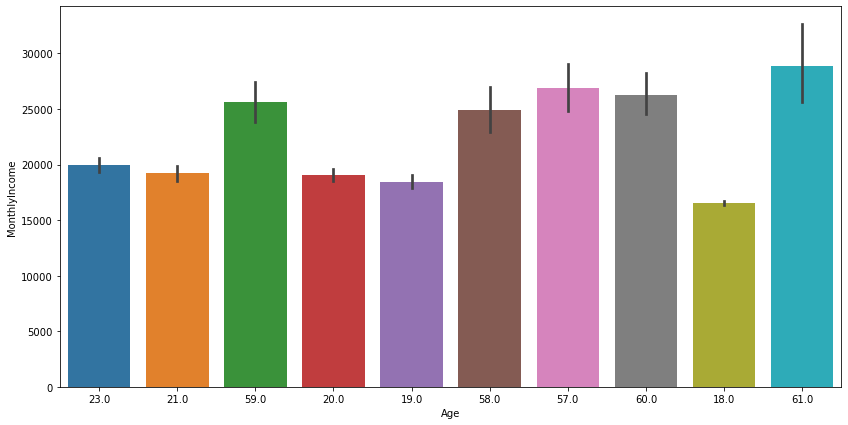

In [107]:
plt.figure(figsize=(14,7))
sns.barplot(data=data,x=data['Age'],y='MonthlyIncome',order=bottom_10_age)

# Observation - Though we can earn high at 61, but we can't travel more,
At age 18, money is a factor which is why people at 18 are at second last in terms of trips
Age group 57-61 and 18-23 forms the lowest 10 age's to trip

([<matplotlib.patches.Wedge at 0x285874e0490>,
 [Text(0.8796019244181518, 0.6605304342419691, '36.0'),
  Text(-0.05501479783332609, 1.0986233986309224, '35.0'),
  Text(-0.6892963992900014, 0.8572458655052466, '34.0'),
  Text(-1.0465925041933701, 0.3385913911579127, '31.0'),
  Text(-1.0647907542951442, -0.2760808750485589, '30.0'),
  Text(-0.7569932174768182, -0.7980985331988117, '32.0'),
  Text(-0.23461366495970404, -1.0746889913896838, '33.0'),
  Text(0.3378537434687831, -1.0468308593197517, '37.0'),
  Text(0.8071098677271223, -0.7473778571897265, '29.0'),
  Text(1.0663302763057279, -0.27007358596084535, '38.0')],
 [Text(0.47978286786444635, 0.3602893277683467, '20.50%'),
  Text(-0.03000807154545059, 0.5992491265259575, '10.59%'),
  Text(-0.3759798541581825, 0.4675886539119526, '9.38%'),
  Text(-0.5708686386509291, 0.18468621335886146, '9.11%'),
  Text(-0.5807949568882604, -0.15058956820830482, '8.93%'),
  Text(-0.41290539135099175, -0.4353264726538973, '8.84%'),
  Text(-0.12797108997

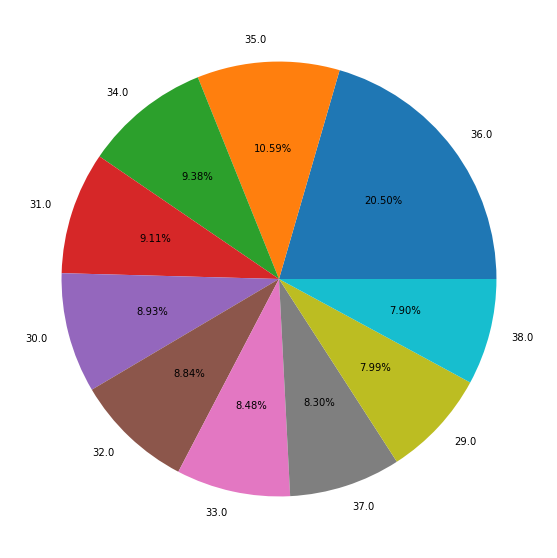

In [109]:
plt.figure(figsize=(10,10))

plt.pie(data=df_age_trips,x=top_10_trips,labels=top_10_age,autopct='%1.2f%%')

# OF the top 10 age, 20.67% people are of age 36
For more clarity below is illustration of top 20 age group with mean monthly income

In [114]:
income_age= data.groupby(['Age'])['MonthlyIncome'].mean().sort_values(ascending =False).reset_index()

In [116]:
income_age.head()

,Age,MonthlyIncome
0,56.0,29407.696429
1,55.0,29271.625000
2,61.0,28877.666667
3,50.0,28653.534884
4,54.0,28636.333333


<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

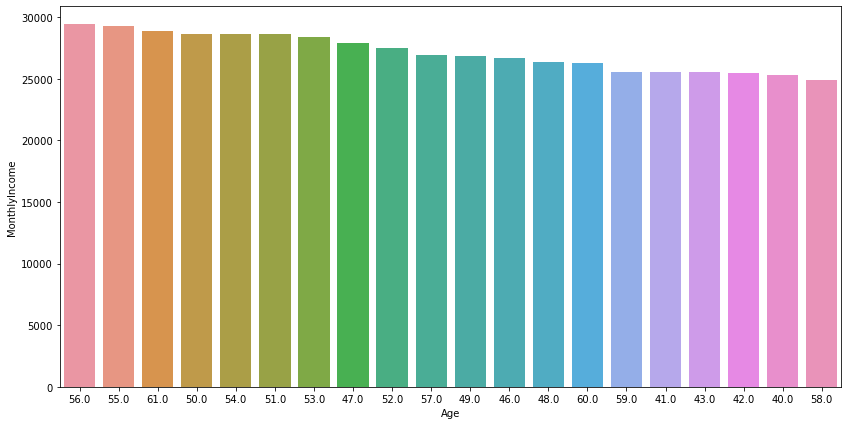

In [117]:
plt.figure(figsize=(14,7))
sns.barplot(data=income_age,x=income_age['Age'][:20],y=income_age['MonthlyIncome'],order=income_age['Age'][:20])

Observation - Age 56 have the highest mean average monthly income

# Let's now explore Who travels the most based on marital status


In [121]:
marital_status_travel = data.groupby(['MaritalStatus'])['NumberOfTrips'].count().sort_values(ascending=False).reset_index()

In [122]:
marital_status_travel.head()

,MaritalStatus,NumberOfTrips
0,Married,2262
1,Divorced,915
2,Single,889
3,Unmarried,682


<AxesSubplot:xlabel='MaritalStatus', ylabel='NumberOfTrips'>

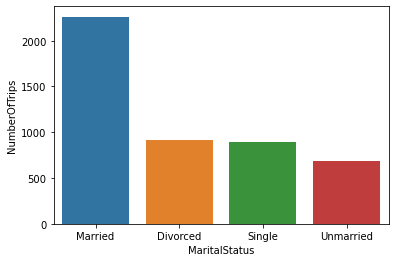

In [125]:
sns.barplot(data=marital_status_travel,y="NumberOfTrips",x='MaritalStatus',)


Observation - Married people travelled most

([<matplotlib.patches.Wedge at 0x28588037790>,
 [Text(0.08144267680282738, 1.0969808979171836, 'Married'),
  Text(-0.9870155787798027, -0.4855926762688777, 'Divorced'),
  Text(0.08797385779808073, -1.0964764476923903, 'Single'),
  Text(0.9898898501048947, -0.479706248301301, 'Unmarried')],
 [Text(0.04442327825608766, 0.5983532170457364, '47.64%'),
  Text(-0.5383721338798924, -0.2648687325102969, '19.27%'),
  Text(0.04798574061713494, -0.5980780623776674, '18.72%'),
  Text(0.5399399182390334, -0.26165795361889144, '14.36%')])

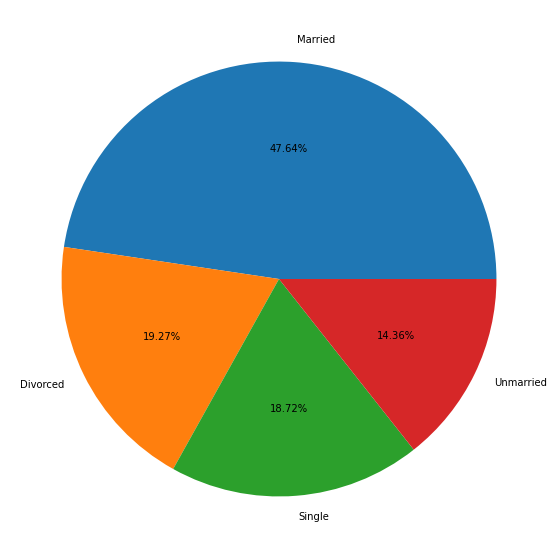

In [127]:
plt.figure(figsize=(10,10))
plt.pie(data=marital_status_travel,x='NumberOfTrips',labels='MaritalStatus',autopct="%1.2f%%")

Observation - 47.64% of people who travelled are married

# Let's now find out how many people who are married, travelled with their childrens


In [128]:
married = data[data['MaritalStatus']=='Married'][['MaritalStatus','NumberOfChildrenVisiting']].reset_index(drop=True)

In [130]:
married.head()

,MaritalStatus,NumberOfChildrenVisiting
0,Married,1.0
1,Married,1.0
2,Married,2.0
3,Married,1.0
4,Married,0.0


In [131]:
married_children=married.groupby('NumberOfChildrenVisiting').count().reset_index().rename(columns={'NumberOfChildrenVisiting':'Children','MaritalStatus':'Count'})


([<matplotlib.patches.Wedge at 0x28588081d30>,
 [Text(0.8574112480933711, 0.6890906701174874, '0.0'),
  Text(-0.992451858614569, 0.47438308183628125, '1.0'),
  Text(0.2468551977883388, -1.0719433340083235, '2.0'),
  Text(1.073105697783523, -0.24175227275982025, '3.0')],
 [Text(0.4676788625963842, 0.37586763824590214, '21.55%'),
  Text(-0.5413373774261284, 0.2587544082743352, '42.71%'),
  Text(0.13464828970273024, -0.5846963640045401, '28.69%'),
  Text(0.5853303806091943, -0.13186487605081104, '7.05%')])

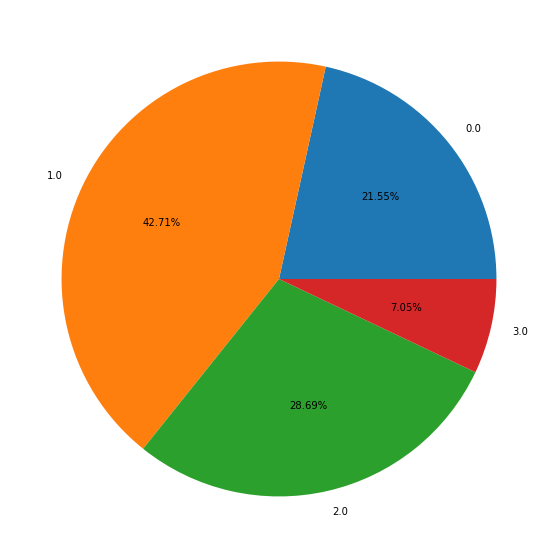

In [132]:
plt.figure(figsize=(10,10))
plt.pie(data=married_children,x='Count',labels='Children',autopct="%1.2f%%")

Observation:- 
42.71% of married people travelled with 1 children and 28.69% of married people travelled with 2 children
Conclusion - Married people presumably between age group 30-38 are the most preffered travellers

# Duration of pitch vs satisfaction score


In [133]:
# Since duration of pitch have two outliers, we kept the pitch time below 100
data_pitch = data[data['DurationOfPitch']<100] 


<AxesSubplot:xlabel='PitchSatisfactionScore', ylabel='DurationOfPitch'>

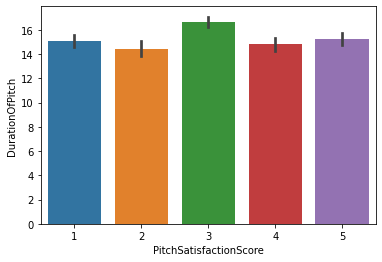

In [134]:
sns.barplot(y=data_pitch['DurationOfPitch'],x=data_pitch['PitchSatisfactionScore'])

# Highest rating 5 have around 15 minutes of pitch time, lets investigate further

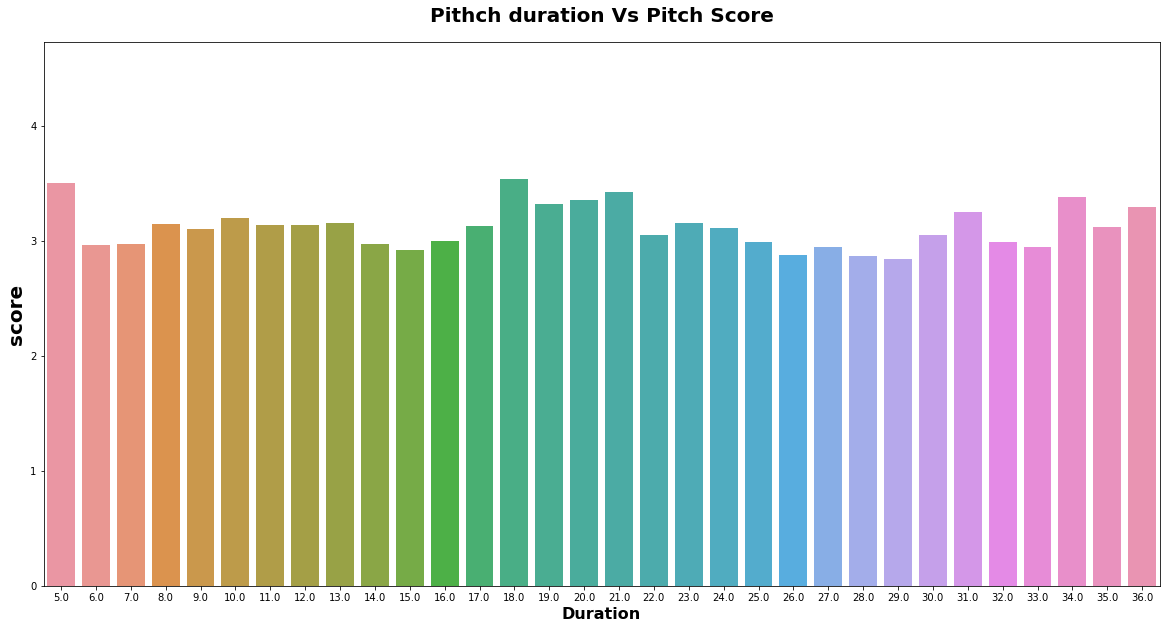

In [135]:
plt.figure(figsize=(20,10))
sns.barplot(x=data_pitch['DurationOfPitch'],y=data_pitch['PitchSatisfactionScore'],errwidth=0,capsize=0)
plt.title("Pithch duration Vs Pitch Score", weight="bold",fontsize=20, pad=20)
plt.ylabel("score", weight="bold", fontsize=20)
plt.xlabel("Duration", weight="bold", fontsize=16)
plt.show()

Observations - 5 minutes,18 minutes and 34 minutes shows most average ratings